# XIV. HASHING: THE BASICS 
You can think about the purpose of the hash table is to maintain a possibly evolving set of things. Where of course the set of things that you're maintaining, you know, will vary with the application. It can be any number of things. So if you're running an e-commerce website, maybe you're keeping track of transactions. You know, again, maybe you're keeping track of people, like for example, your friends and various data about them. So maybe you're keeping track of I-P addresses, for example if you wanna know, who was, were there unique visitors to your websites. And so on. So a little bit more formally, you know, the basic operations, you need to be able to insert stuff into a hash table. In many, but not all applications, you need to be able to delete stuff as well. And typically the most important operation is look-up. And for all these three operation you do it in a key based way. Where as usual a key should just be a unique identifier for the record that you're concerned with.

The caveat is that, unlike most of the problems that we've solved in this course, hash tables don't enjoy worst case guarantees. You cannot say for a given hash table that for every possible data set you're gonna get cost and time. What's true is that for non-pathological data, you will get cost and time operations in a properly implemented hash table.

***
##### Properties of Hash function:
1. Should lead to good performance (i.e. should spread data out)
2. Should be easy to evaluate / fast to calculate
<br>
 And in particular good hash functions that have the two properties we identified above. But I have to warn you, if you ask ten different, you know, serious hardcore programmers, you know, about their approach to designing hash functions, you're likely to get ten somewhat different answers. So the design of hash functions is a tricky topic, and, it's as much art as science at this point.
*** 

##### Resolving Collisions: 
    1. Chaining  
    2. Open addressing(linear probing and double hashing)
    
***
##### linear probing
In linear probing, even in a best case scenario, it's going to be subject to clumping. You're going to have contiguous Groups of slots which are all full, and that's because of the linear probing strategy. 

***

## Quick and Dirty Hash Function
In particular if you just need a hash function, and you need a quick and dirty one, you don't want to spend too much time on it. The method that I'm going to talk about below is a common way of doing it. On the other hand, if you're designing a hash function for some really mission-critical code, you should learn more than what I'm gonna tell you about below. So you, you should do more research about what are the best hash functions, what's the state of the art, if you have a super important hash function.

There are standard methods for doing that, it's easy to find resources to, to give you example code for converting strings to integers you know, I'll just say one or two sentences about it. So you know each character in a string it is easy to regard as a number in various ways. Either you know just say it is ASCII, well ASCII code then you just have to aggregate all of the different numbers, one number per character into some overall number and so one thing you can do is you can iterate over the characters one at a time. You can keep a running sum. And with each character, you can multiply the running sum by some constant, and then add the new letter to it, and then, if you need to, take a module list to prevent overflow.

![Quick and Dirty Hash Function](images/4_quick_and_dirty_hash_function.png)


# XV. UNIVERSAL HASHING 
If we have our set h that we know exactly what it is. What does it mean that it's universal? It means for each pair of distinct keys, for example for each pair of IP addresses, the probability that a random hash function from our family script h causes a collision, maps these two IP addresses to the same bucket should be no worse than with perfectly random hashing. So no worse than 1/n where n is the number of buckets, say like 997.
So  if you draw a hash function uniformly at random from a universal family of hash functions, then you're guaranteed expected constant time for all of the supported operations. 

![UNIVERSAL HASHING](images/5_universal_hashing.png)


So hash tables support various operations, Insert, Delete and Lookup. But really if we can just bound a running time of an unsuccessful lookup, that's going to be enough to bound the running time of all of these operations. 

So, as long as you have a hash function which you can compute quickly in constant time. And as long as you keep the load under control so the number of buckets is commensurate with the size of the data set that you're storing. That's why, universal hash functions in a hash table with chaining guarantee expected constant time performance.

***

Below we have implemented hash table datastructure using universal hashing using Chaining to resolve collision

In [78]:
import urllib3


class Hash_Table_chaining:
    from random import randint
    import matplotlib.pyplot as plt
    
    #import numpy as np
    
    def __init__(self, size = 1000):
        self.hash_table = [None] * size
        self.random_nos = [self.randint(1, size) for _ in range(0, 4)]
        
    def __repr__(self):
        return str(self.hash_table)
            
    def __getitem__(self, index):
        n = len(self.hash_table)
        if n <= index:
            return None
        else:
            return self.hash_table[index]
    
    def __setitem__(self, index, value):
        self.hash_table[index] = value

    def universal_hashing(self, element):
        character_arr = list(element) 
        ord_arr = [ord(i) for i in character_arr]
        # universal hashing using random choice from a family of hash functions
        # our family of hash functions has to choose 4 random number from 1 to 1000 as we have n = 1000 = number of buckets
        # thus our random hash function is equivalent to the gold standard of uniform random variable that
        # would've chosen an index in the array of size 1000 
        len25 = len(ord_arr) // 4
        dot_sum_ord = 0
        index = None
        for piece in range(len(self.random_nos)):
            dot_sum_ord += self.random_nos[piece] * sum(ord_arr[piece*len25:(piece+1)*len25]) 
            index = dot_sum_ord % 997  # avoiding 2 or 10 and using prime close to n = 1000 = number of buckets
        return index
            
            
    def insert(self, element):
        index = self.universal_hashing(element)
        if self.hash_table[index] == None:
            self.hash_table[index] = [element]
        else:
            self.hash_table[index].append(element)
            
            
    def lookup(self, element):
        index = self.universal_hashing(element)
        if self.hash_table[index] == None:
            return None
        elif element not in self.hash_table[index]:
            return None
        else:
            return index
        
    def delete(self, element):
        index = self.universal_hashing(element)
        if self.hash_table[index] == None:
            return None
        elif element not in self.hash_table[index]:
            return None
        else:
            self.hash_table[index].remove(element)
            return index
        
        
    def _load_index(self, index):
        if self.hash_table[index] == None:
            return 0
        else:
            return len(self.hash_table[index])
        
    
    def load_visualize(self):
        index = range(len(self.hash_table))
        load = [self._load_index(i) for i in index]
        self.plt.bar(index, load)
        self.plt.xlabel('Hash table Indices', fontsize=5)
        self.plt.ylabel('Load', fontsize=5)
        #self.plt.xticks(index, label, fontsize=5, rotation=30)
        self.plt.title('Hash table Load Visualization')
        self.plt.show()
    


In [79]:
hash_table_obj = Hash_Table_chaining(1000)

# insert api
http = urllib3.PoolManager()
r1 = http.request('GET', "https://raw.githubusercontent.com/aishwarya34/AlgorithmsIlluminated/master/500_twitch_usernames.txt")
IntegerMatrixStringJoin = r1.data.split('\n')
IntegerMatrixStringJoin = IntegerMatrixStringJoin[:-1]
for username in IntegerMatrixStringJoin:
    hash_table_obj.insert(username)
        
# lookup api        
#print(hash_table_obj)
print("Element \'watermelonfarmers\' found at index : {}".format(hash_table_obj.lookup('watermelonfarmers')))

Element 'watermelonfarmers' found at index : 201


/Users/aishwaya/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [81]:
# __getitem__ and __setitem__
print(hash_table_obj[0])
hash_table_obj[0] = None
print(hash_table_obj[0])
print(hash_table_obj[201])

None
None
['watermelonfarmers']


In [82]:
# delete api
print("Element \'watermelonfarmers\' found at index : {}".format(hash_table_obj.lookup('watermelonfarmers')))
print(" \'watermelonfarmers\' deleted at index : {}".format(hash_table_obj.delete('watermelonfarmers')))
print("Element \'watermelonfarmers\' found at index : {}".format(hash_table_obj.lookup('watermelonfarmers')))

Element 'watermelonfarmers' found at index : 201
 'watermelonfarmers' deleted at index : 201
Element 'watermelonfarmers' found at index : None


### You can see below the minimum load is 0 and maximum load is 5

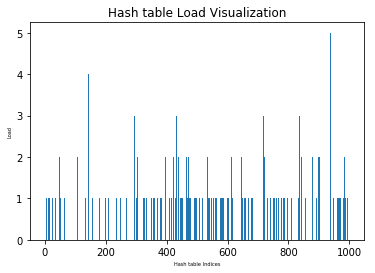

In [83]:
hash_table_obj.load_visualize()

# XVI. BLOOM FILTERS 
Bloom filters are variant on hash tables. The win that you get in Bloom filters is that they are more space efficient than run of the mill hash tables and they're going to handle, they do allow for errors, there is a non zero false positive probability when you do look ups but that's still a win for some applications. 

So, the first drawback of the Bloom filter is that because we want to be so space efficient, we don't even want to remember the object itself just whether or not we've seen it before. We're not going to be able to store the objects or even pointers to the objects in a Bloom filter. We're just going to remember what we've seen and what we haven't. 

The second con is at least in the vanilla implementation of Bloom filters that I'm going to describe here, deletions are not allowed. You can only insert, you can't delete. The situation with deletions is very much similar to hash tables implemented with open addressing. It's not that you can't have a Bloom filter that accommodates deletion, you can, there are very instances of it but that requires significantly more work and we're not going to discuss it here. 

Now, the third con and this is a drawback that we have not see previously using any data structures is Bloom filters can actually make mistakes. Now, what kind of mistake could this kind of data structure possibly make when all you're really doing is looking something up. Well, one of mistake would be a false negative and that means you have inserted something previously then you look it up and the hash table or the Bloom filter says, it's not there. So, Bloom filters will not have false negatives of this form. You've insert something, you look it up later, it's definitely going to confirm that you inserted it in the past. But Bloom filters will have false positives, that means that despite the fact you have never inserted say, a given IP address into the, into the Bloom filter, if you look it up later, it will say that you have. So, there will sometimes be in some sense phantom objects in Bloom filters, objects which it thinks have been inserted even though they haven't been. 

***

    Use Bloom filters where you either really care about space and/or you don't really care about this false positive probability. 

***
##### Bloom Filter implementation

So, like hash tables, Bloom filters have essentially two ingredients. First of all, there's an array and second of all, there's a hash function or in fact, several hash functions. So, we're going to have a random access array except, instead of having n buckets or n slots as we've been calling them, each entry in this array is just going to be a single bit. Each entry in this array can only take on two values, zero or one. And the way they think about the space occupied by Bloom filters is in terms of the number of bits per object that has been inserted into the Bloom filter. So, if you have inserted the data set capital S, then the total number of bits is n, the number of objects that have been inserted is cardinality of s. So, n / |s| is the number of bits in this data structure that you are using per entry in the data set. Now, you can tune a Bloom filter so this ratio is any number of different quantities but for now, I encourage you to think of this ratio as being eight, that is for each object stored in the Bloom Filter, you are using only eight bits of memory.

So, in a Bloom filter, its important to have not one hash function, but several hash functions. So, k is going to denote the number of hash functions in the Bloom filter which you think of k is some small constant somewhere, you know, three, four, five, or something like that. So, obviously it's a little bit more complicated to use multiple hash functions as supposed to just one hash function. But it's really not that big of deal. So, we'll call from our discussion of say, universal hashing, we have identified the entire families of hash functions which will work well on average. So, instead of choosing just using one hash function at random from universal family, you gave me k independent random choices from universal family. In fact, in practice, it seems to typically be enough to just use two different hash functions and then generate k different linear combinations of those two hash functions. But for the purposes of this video, let's just assume that we've done enough work to come up with k, different good hash functions and that's what we're going to be using in our Bloom filter. 

So, let's start by insertion. So, suppose we have some new IP address and we want to stick into these Bloom filter, what we do? Well, we'll just evaluate each of our k hash functions on this new object. Each of those tells us an index into our array of bits and we'll just set those k bits equal to one. And when we do this insert, we don't even bother to look at what the previous values of these bits were.. So, zero or one, we don't care. We'll just blithely go in and set this k bits equal to one, whatever they were before. 

So, what about looking up? How are we going to implement that? Well, all you have to do is check for the footprint that was inevitably left by a prior insertion. So, if we're looking up an IP address and we know was inserted sometime in the past, what happened when we evaluated the k hash functions, we went t o appropriate positions in the array and we set all of those bits to one. So now, I'll just check that, that indeed happened, that is when we get a new IP address, we're looking it up. We evaluate the hash functions, all k of them. We look at the corresponding k positions and we verified that indeed those k bits have been set to one.

##### False Positive

So, what I hope is clear fairly quickly from inspecting this very elegant code is that we will not ever have false negatives, yet, we might have false positives. 

Notice when a bit is one, it remains one forevermore. That bits are never reset back to zero. So, if anything was ever inserted in the subs when we look it up, definitely we well confirm that all those bits are one. So, we're never going to be rejected by something we inserted before. On the other hand, it is totally possible that we will have a false positive. It's totally possible that there will be a phantom object and we'll do a look up and the Bloom filter will turn yes when we never inserted that object. 


In [92]:
import urllib3


class Bloom_Filter:
    from random import randint
    import matplotlib.pyplot as plt
    
    #import numpy as np
    
    def __init__(self, size = 1000, hash_func_num = 5):
        self.bloom_filter = [0] * size
        self.hash_function_family = [[self.randint(1, size) for _ in range(0, 4)] for _ in range(0, hash_func_num)]
        
    def __repr__(self):
        return str(self.bloom_filter)
            
    def __getitem__(self, index):
        n = len(self.bloom_filter)
        if n <= index:
            return None
        else:
            return self.bloom_filter[index]
    
    def __setitem__(self, index, value):
        self.bloom_filter[index] = value

    def universal_hashing(self, element):
        character_arr = list(element) 
        ord_arr = [ord(i) for i in character_arr]
        # bloom_filter using a family of hash functions
        # our family of hash functions has to choose 4 random number from 1 to 1000 as we have n = 1000 = number of buckets
        # thus our random hash function is equivalent to the gold standard of uniform random variable that
        # would've chosen an index in the array of size 1000 
        len25 = len(ord_arr) // 4
        dot_sum_ord = 0
        index = []
        for hash_func in self.hash_function_family:
            for piece in range(len(hash_func)):
                dot_sum_ord += hash_func[piece] * sum(ord_arr[piece*len25:(piece+1)*len25]) 
                index.append(dot_sum_ord % 997)  # avoiding 2 or 10 and using prime close to n = 1000 = number of buckets
        return index
            
            
    def insert(self, element):
        index = self.universal_hashing(element)
        for i in index:
            self.bloom_filter[i] = 1
            
            
    def lookup(self, element):
        index = self.universal_hashing(element)
        value = [self.bloom_filter[i] for i in index]
        if 0 in value:
            return False
        else:
            return True
        
        
    def _load_index(self, index):
        if self.bloom_filter[index] == None:
            return 0
        else:
            return 1
        
    
    def load_visualize(self):
        index = range(len(self.bloom_filter))
        load = [self._load_index(i) for i in index]
        self.plt.bar(index, load)
        self.plt.xlabel('Hash table Indices', fontsize=5)
        self.plt.ylabel('Load', fontsize=5)
        #self.plt.xticks(index, label, fontsize=5, rotation=30)
        self.plt.title('Hash table Load Visualization')
        self.plt.show()
    




#### Testcases Bloom Filter
1. 
Keep bloom filter size = 1000 & num of hash functions = 5 and then check the false positive count.<br>
Here we are inserting only 100 of 500 usernames in the bloom filter.

In [93]:
import random

bloom_filter_obj = Bloom_Filter(1000)

# insert api
http = urllib3.PoolManager()
r1 = http.request('GET', "https://raw.githubusercontent.com/aishwarya34/AlgorithmsIlluminated/master/500_twitch_usernames.txt")
IntegerMatrixStringJoin = r1.data.split('\n')
IntegerMatrixStringJoin = IntegerMatrixStringJoin[:-1]
random.shuffle(IntegerMatrixStringJoin)

cut = 100
list_1 = IntegerMatrixStringJoin[:cut]
list_2 = IntegerMatrixStringJoin[cut:]
for username in list_1:
    bloom_filter_obj.insert(username)
        

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 

/Users/aishwaya/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [96]:
# lookup api   to check false positives on usernames not inserted into the bloom filter   
false_positive = 0
for li in list_2:
    false_positive += bloom_filter_obj.lookup(li)
print("Total False Positives: {}/400 = {}".format(false_positive, false_positive/400.0))



Total False Positives: 28/400 = 0.07


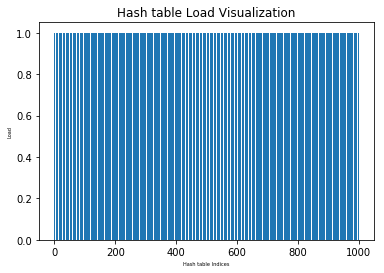

In [97]:
bloom_filter_obj.load_visualize()

2) Keep bloom filter size = 1000 & num of hash functions = 6 and then check the false positive count.<br>
    Here we are inserting only 100 of 500 usernames in the bloom filter.<br>
    We see that the number of false positive have increased

/Users/aishwaya/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Total False Positives: 31/400 = 0.0775


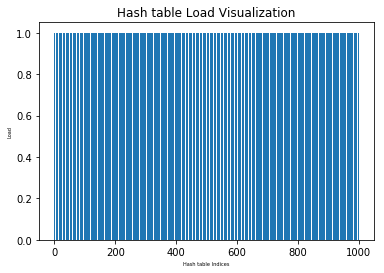

In [100]:
import random

bloom_filter_obj = Bloom_Filter(1000, hash_func_num = 6)

# insert api
http = urllib3.PoolManager()
r1 = http.request('GET', "https://raw.githubusercontent.com/aishwarya34/AlgorithmsIlluminated/master/500_twitch_usernames.txt")
IntegerMatrixStringJoin = r1.data.split('\n')
IntegerMatrixStringJoin = IntegerMatrixStringJoin[:-1]
random.shuffle(IntegerMatrixStringJoin)

cut = 100
list_1 = IntegerMatrixStringJoin[:cut]
list_2 = IntegerMatrixStringJoin[cut:]
for username in list_1:
    bloom_filter_obj.insert(username)
    
# lookup api   to check false positives on usernames not inserted into the bloom filter   
false_positive = 0
for li in list_2:
    false_positive += bloom_filter_obj.lookup(li)
print("Total False Positives: {}/400 = {}".format(false_positive, false_positive/400.0))

bloom_filter_obj.load_visualize()
        

3) Keep bloom filter size = 2000 & num of hash functions = 5 and then check the false positive count.<br>
    Here we are inserting only 100 of 500 usernames in the bloom filter. <br>
    We see that the number of false positive have decreased

/Users/aishwaya/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Total False Positives: 21/400 = 0.0525


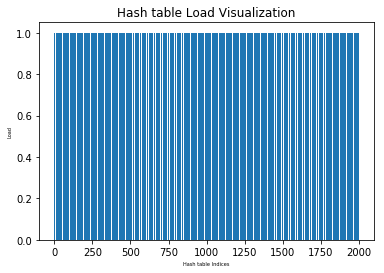

In [104]:
import random

bloom_filter_obj = Bloom_Filter(size = 2000, hash_func_num = 5)

# insert api
http = urllib3.PoolManager()
r1 = http.request('GET', "https://raw.githubusercontent.com/aishwarya34/AlgorithmsIlluminated/master/500_twitch_usernames.txt")
IntegerMatrixStringJoin = r1.data.split('\n')
IntegerMatrixStringJoin = IntegerMatrixStringJoin[:-1]
random.shuffle(IntegerMatrixStringJoin)

cut = 100
list_1 = IntegerMatrixStringJoin[:cut]
list_2 = IntegerMatrixStringJoin[cut:]
for username in list_1:
    bloom_filter_obj.insert(username)
    
# lookup api   to check false positives on usernames not inserted into the bloom filter   
false_positive = 0
for li in list_2:
    false_positive += bloom_filter_obj.lookup(li)
print("Total False Positives: {}/400 = {}".format(false_positive, false_positive/400.0))

bloom_filter_obj.load_visualize()
        

4) Keep bloom filter size = 1000 & num of hash functions = 5 and then check the false positive count.<br>
    Here we are inserting only 200 of 500 usernames in the bloom filter. <br>
    We see that the number of false positive have increased dramatically

/Users/aishwaya/anaconda2/lib/python2.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Total False Positives: 206/400 = 0.515


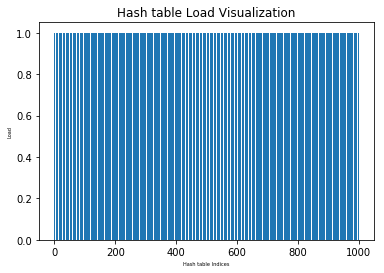

In [106]:
import random

bloom_filter_obj = Bloom_Filter(size = 1000, hash_func_num = 5)

# insert api
http = urllib3.PoolManager()
r1 = http.request('GET', "https://raw.githubusercontent.com/aishwarya34/AlgorithmsIlluminated/master/500_twitch_usernames.txt")
IntegerMatrixStringJoin = r1.data.split('\n')
IntegerMatrixStringJoin = IntegerMatrixStringJoin[:-1]
random.shuffle(IntegerMatrixStringJoin)

cut = 200
list_1 = IntegerMatrixStringJoin[:cut]
list_2 = IntegerMatrixStringJoin[cut:]
for username in list_1:
    bloom_filter_obj.insert(username)
    
# lookup api   to check false positives on usernames not inserted into the bloom filter   
false_positive = 0
for li in list_2:
    false_positive += bloom_filter_obj.lookup(li)
print("Total False Positives: {}/400 = {}".format(false_positive, false_positive/400.0))

bloom_filter_obj.load_visualize()
        